# DROPSINATOR


## Import

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from lmfit.models import GaussianModel

from scipy.signal import find_peaks
from scipy import optimize as optim

import uncertainties as unc


import sys
sys.path.append('../Library')

import drop_detection_tools as ddt
import uplotlib as uplt


plot_dir = '../../../Report/Plots/'
result_dir = '../../../T-data/Results/'

plot_dir.rstrip('/')
result_dir.rstrip('/')

from importlib import reload


from tqdm import tqdm
%matplotlib inline
import csv

## Latex plot

In [2]:
FontSize = 18
plt.rc('axes',   titlesize = FontSize) # fontsize of the axes title
plt.rc('axes',   labelsize = FontSize) # fontsize of the x and y labels
plt.rc('xtick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('ytick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('legend', fontsize  = FontSize) # legend fontsize
plt.rc('figure', titlesize = FontSize) # fontsize of the figure title

matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size' :  18,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

## Data acquisition

name = '2-12_A-ol5-aq5'


<IPython.core.display.Javascript object>


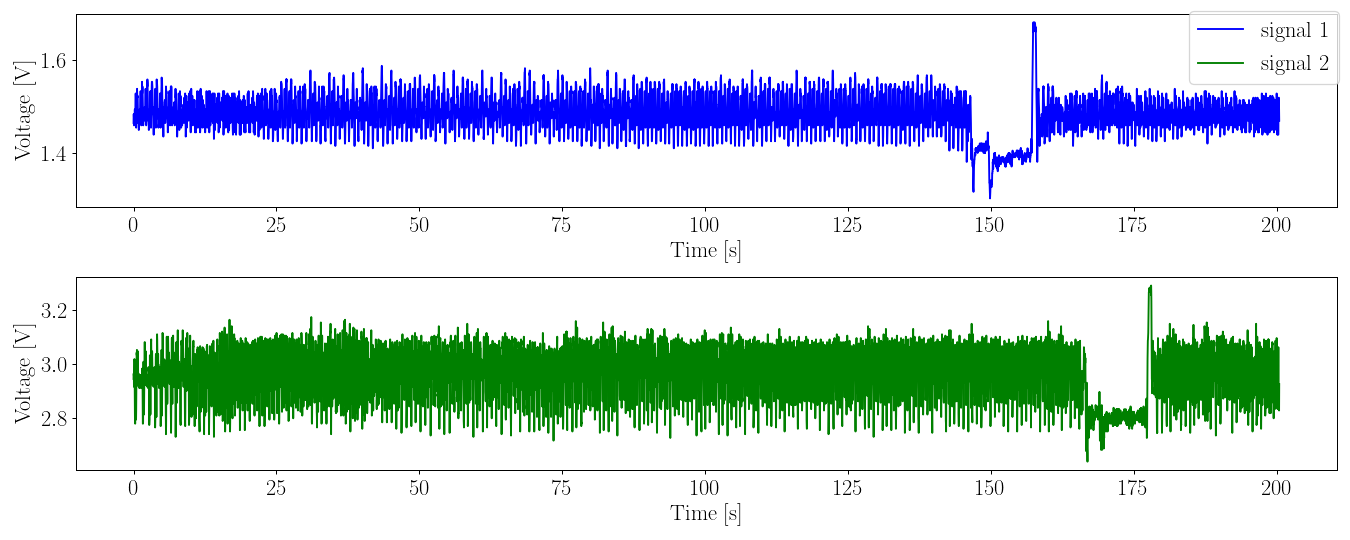

../Library\drop_detection_tools.py:55: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best')


In [14]:
#************************************
folder   = '../../../T-data/2-12/'
filename = 'A-ol5-aq5-pause10.csv'

fol_name = folder.rstrip('/').rsplit('/', 1)[1]

name     = fol_name + '_' + filename.rsplit('-',1)[0]
print(f'{name = }')
#************************************

raw = True 
sig1, sig2, t_raw = ddt.read_LV(folder, filename)

## Resample data

<IPython.core.display.Javascript object>


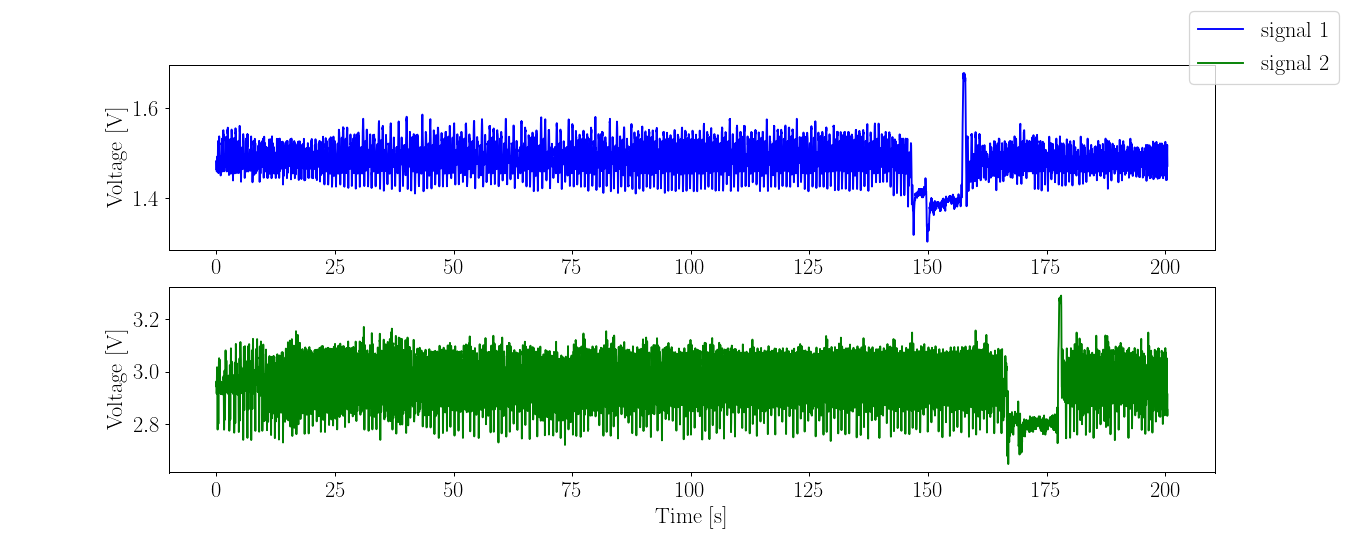

<ipython-input-15-b3cd88503f96>:23: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best')


In [15]:
#******************************
dt = 0.01  # sampling time [s]
#******************************
%matplotlib notebook
%matplotlib notebook
# Resampling of the two signals
if raw:
    sig1, new_t = ddt.resample(sig1, t_raw, dt=dt)
    sig2, _     = ddt.resample(sig2, t_raw, dt=dt)
    t           = new_t
    raw         = False 
else:
    print('data already resampled')

    
# Signals plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
axs[0].plot(t, sig1, color='blue', label= "signal 1")
axs[0].set_ylabel('Voltage [V]')
axs[1].plot(t, sig2, color='green', label= "signal 2")
axs[1].set_ylabel('Voltage [V]')
axs[1].set_xlabel('Time [s]')
fig.legend(loc='best')

## Fourier transform


In [19]:
min_freq  = 1       # lower cut-off frequency
max_freq  = 1000   # higher cut-off frequency

### Signal 1 

<IPython.core.display.Javascript object>


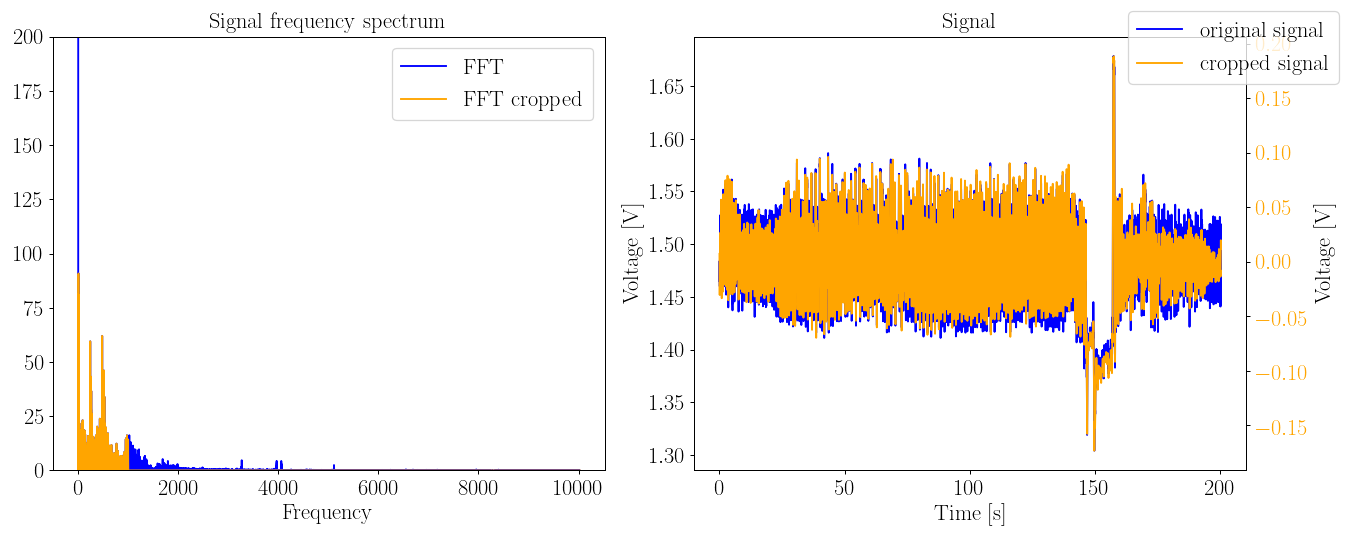

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
../Library\drop_detection_tools.py:291: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  legend = fig.legend(['original signal','cropped signal'], loc='best')


In [20]:
%matplotlib notebook
%matplotlib notebook
sig1_high = ddt.FFT_cropping(sig1, t, min_freq, max_freq)


### Signal 2 

<IPython.core.display.Javascript object>


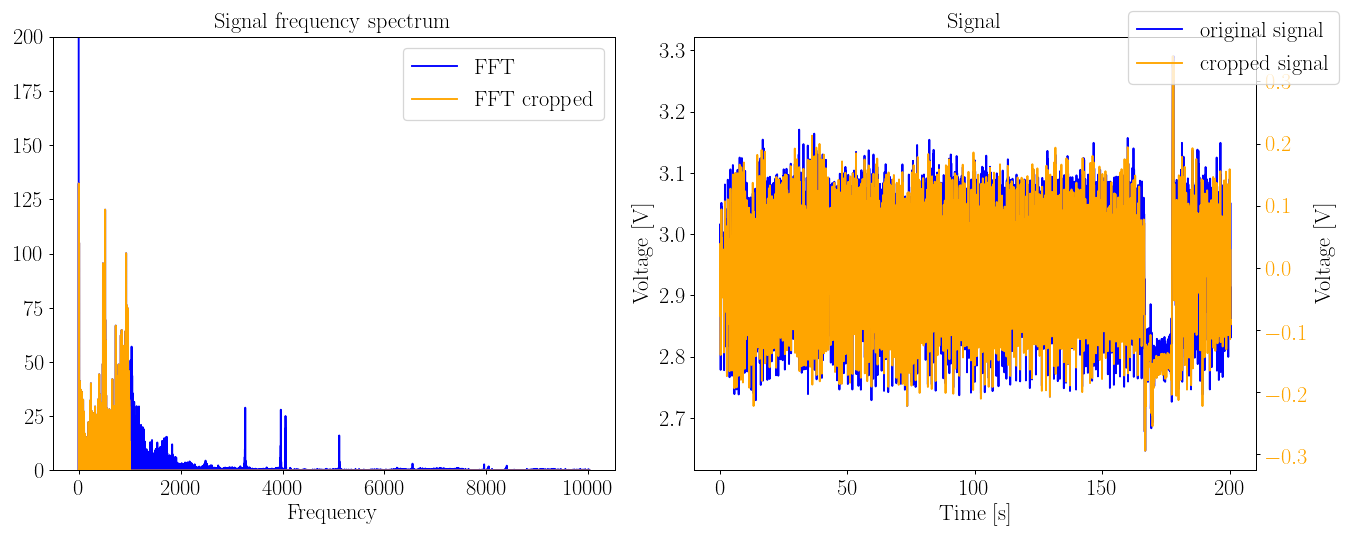

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
../Library\drop_detection_tools.py:291: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  legend = fig.legend(['original signal','cropped signal'], loc='best')


In [21]:
sig2_high = ddt.FFT_cropping(sig2, t, min_freq, max_freq)

## Signal Rectify

### Signal 1 

In [37]:
sig1_r = sig1_high
sig2_r = sig2_high

100%|██████████████████████████████████████████████████████████████████████████| 33042/33042 [00:06<00:00, 4944.06it/s]


<IPython.core.display.Javascript object>


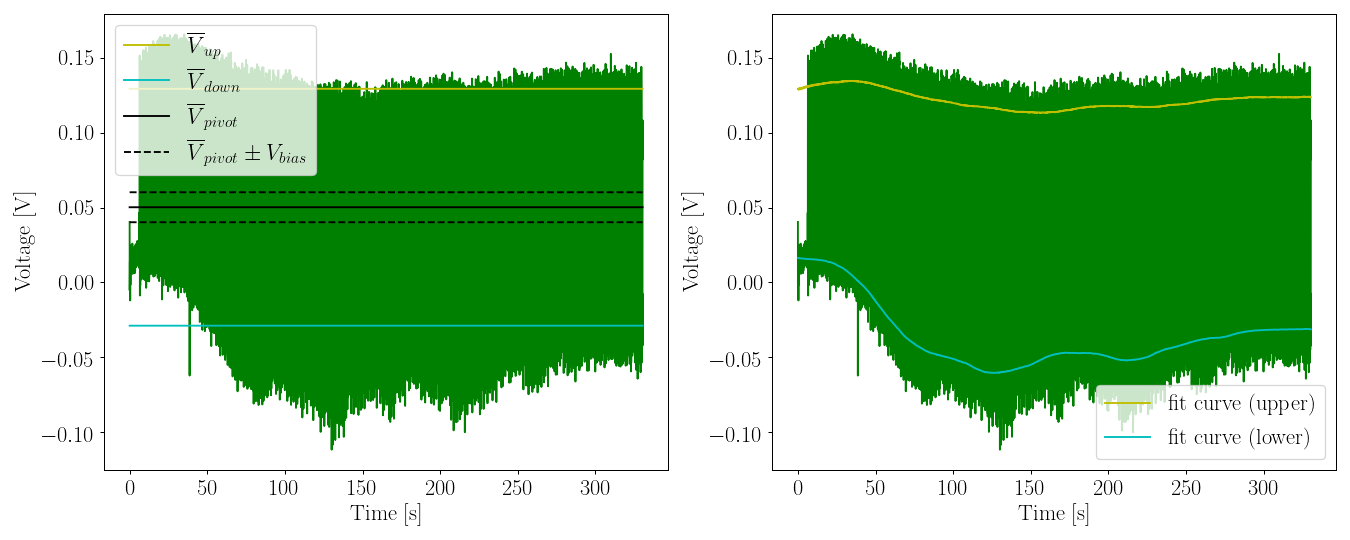

<IPython.core.display.Javascript object>


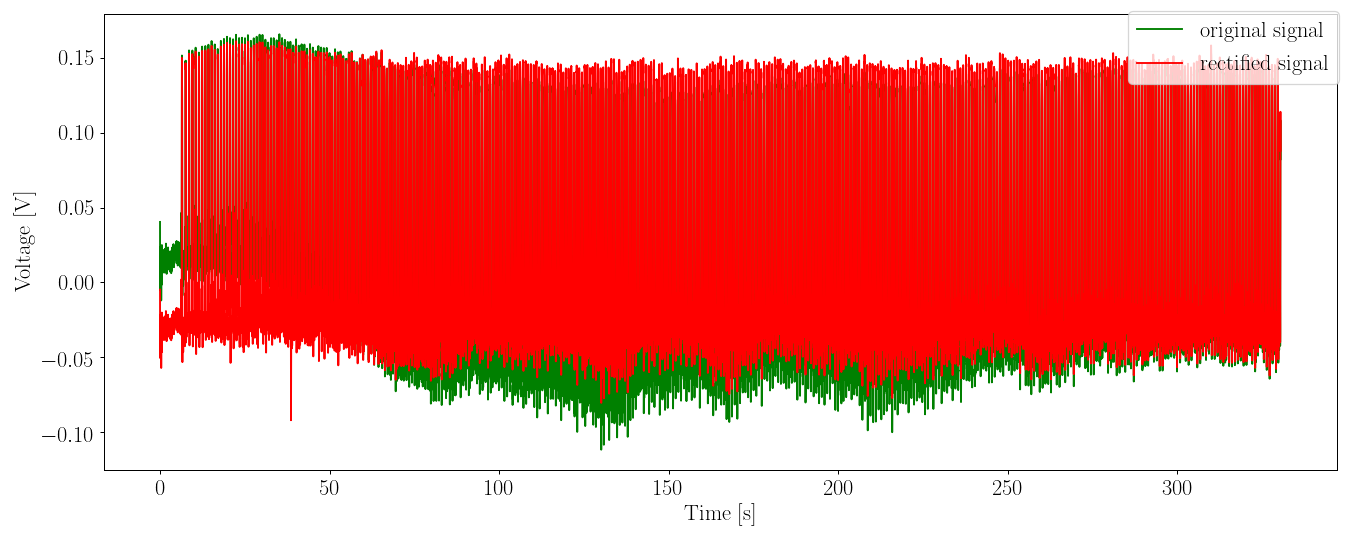

In [62]:
%matplotlib notebook
reload(ddt)
fig, sig1_r = ddt.rectify_new(sig1_high, xrange=20, xdata=t, ignore_bias=0.01, manual_thr=-0.13)

100%|██████████████████████████████████████████████████████████████████████████| 33042/33042 [00:04<00:00, 7984.46it/s]


<IPython.core.display.Javascript object>


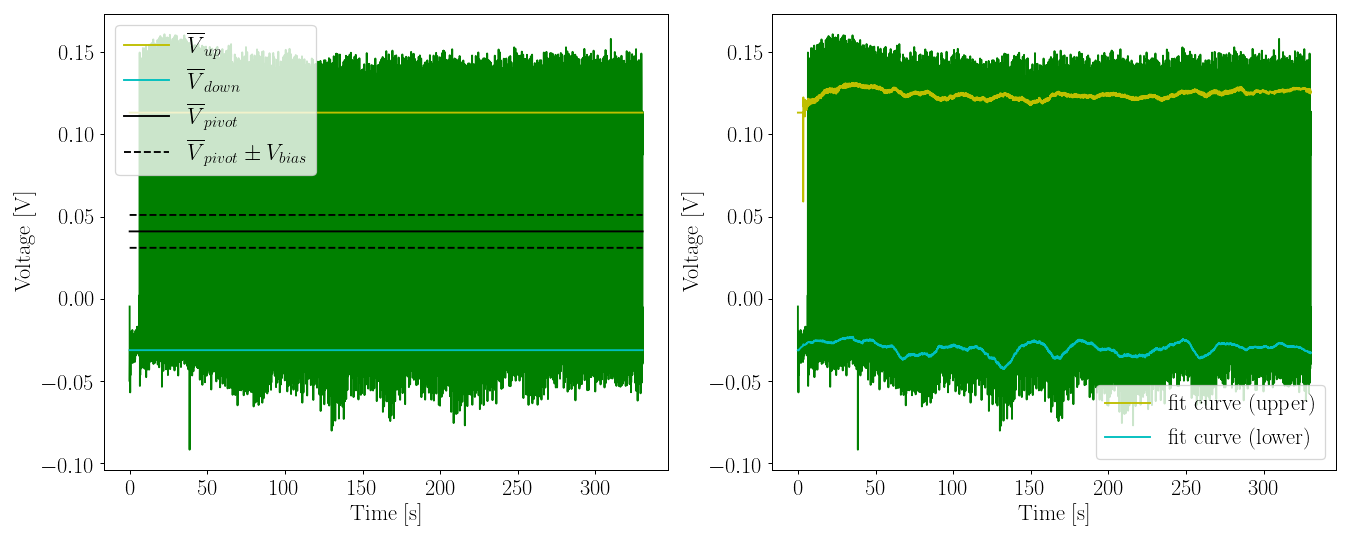

<IPython.core.display.Javascript object>


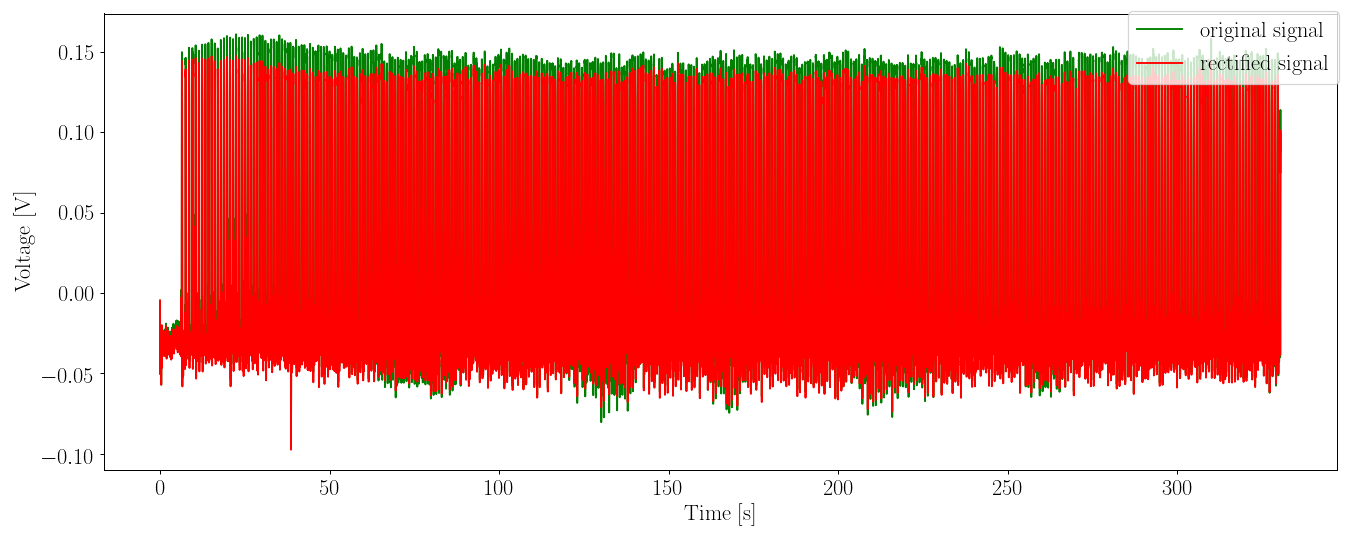

In [63]:
reload(ddt)
fig, sig1_r = ddt.rectify_new(sig1_r, xrange=3, xdata=t, ignore_bias=0.01, manual_thr=-0.13)

### Signal 2

100%|██████████████████████████████████████████████████████████████████████████| 33042/33042 [00:06<00:00, 5158.80it/s]


<IPython.core.display.Javascript object>


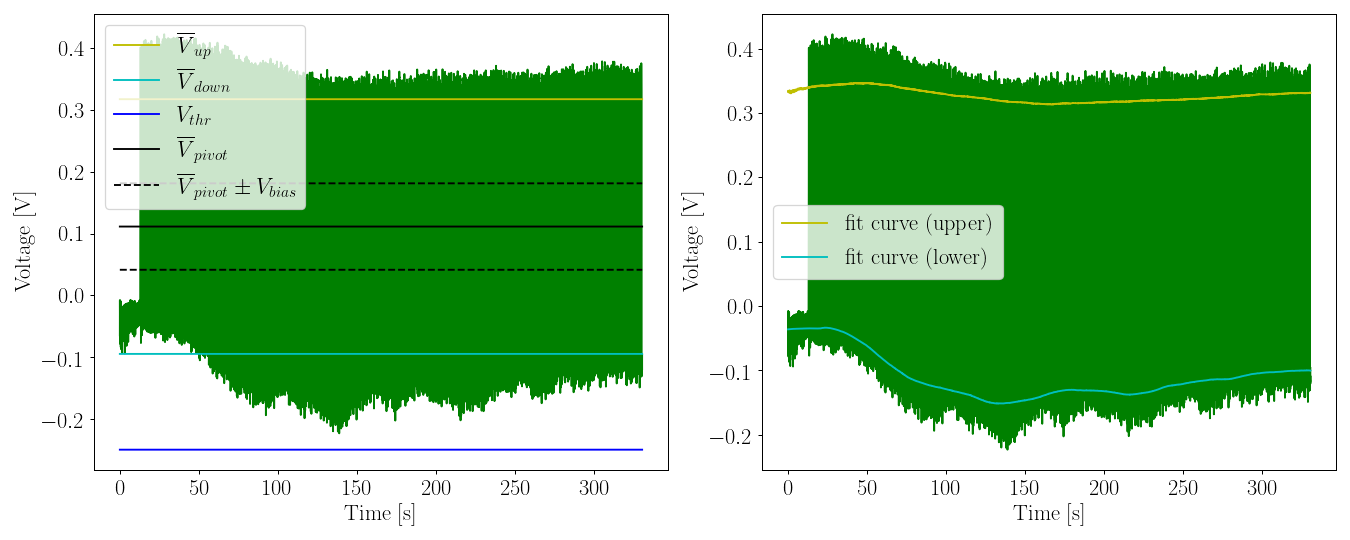

<IPython.core.display.Javascript object>


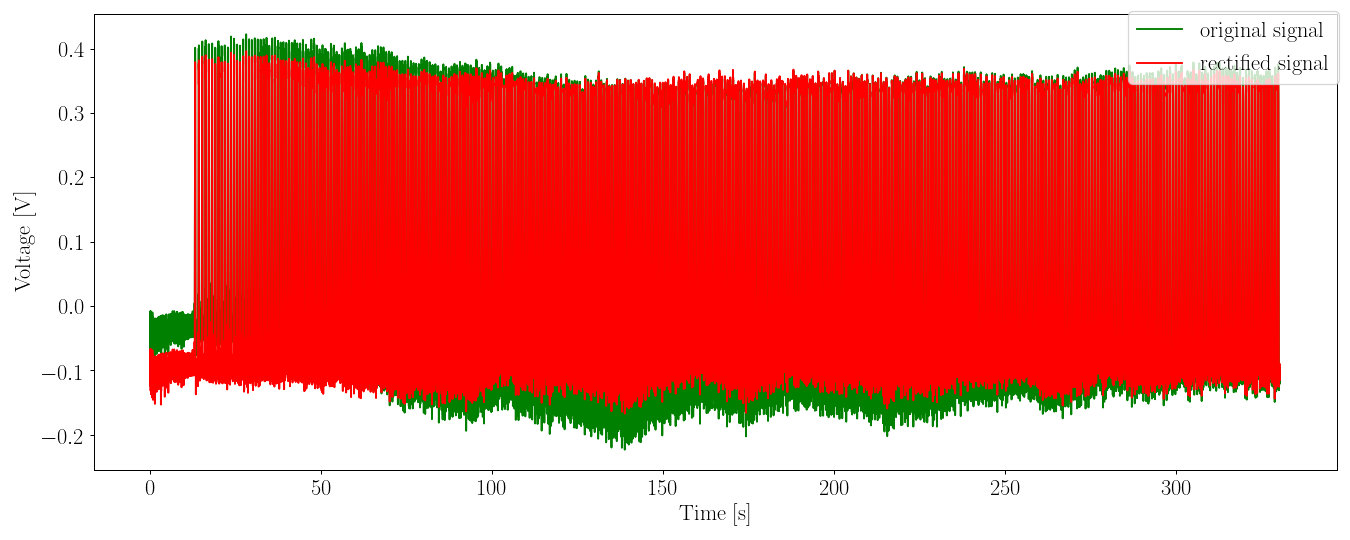

In [77]:
reload(ddt)
fig, sig2_r = ddt.rectify_new(sig2_high, xrange=20, xdata=t, ignore_bias=0.07, manual_thr=-0.25)

100%|██████████████████████████████████████████████████████████████████████████| 33042/33042 [00:04<00:00, 7793.50it/s]


<IPython.core.display.Javascript object>


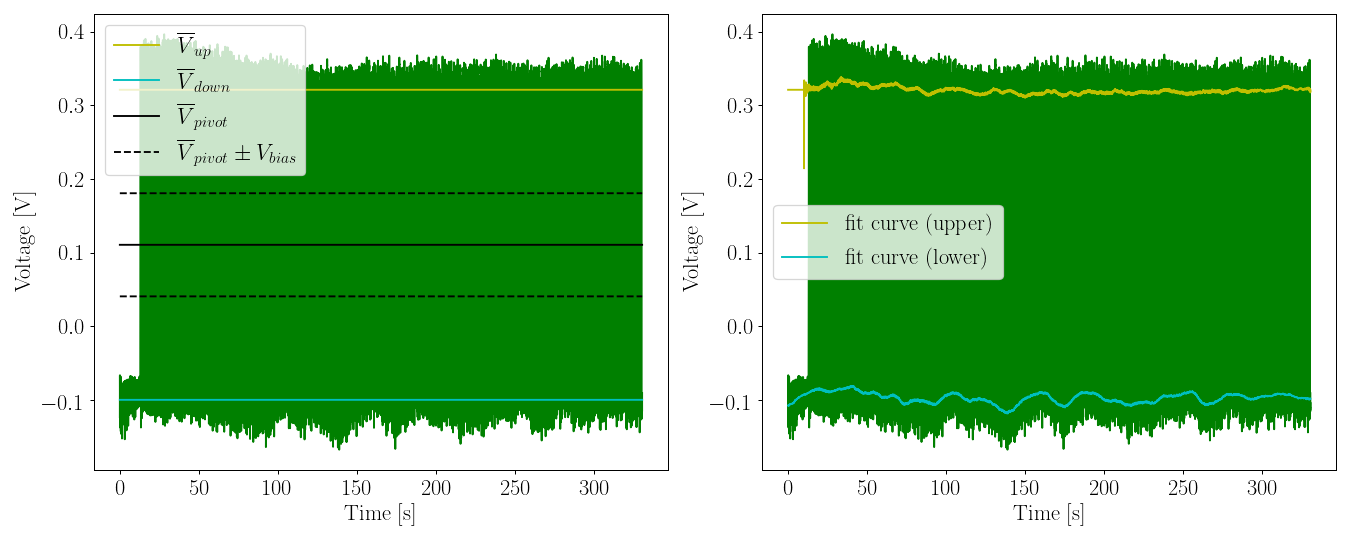

<IPython.core.display.Javascript object>


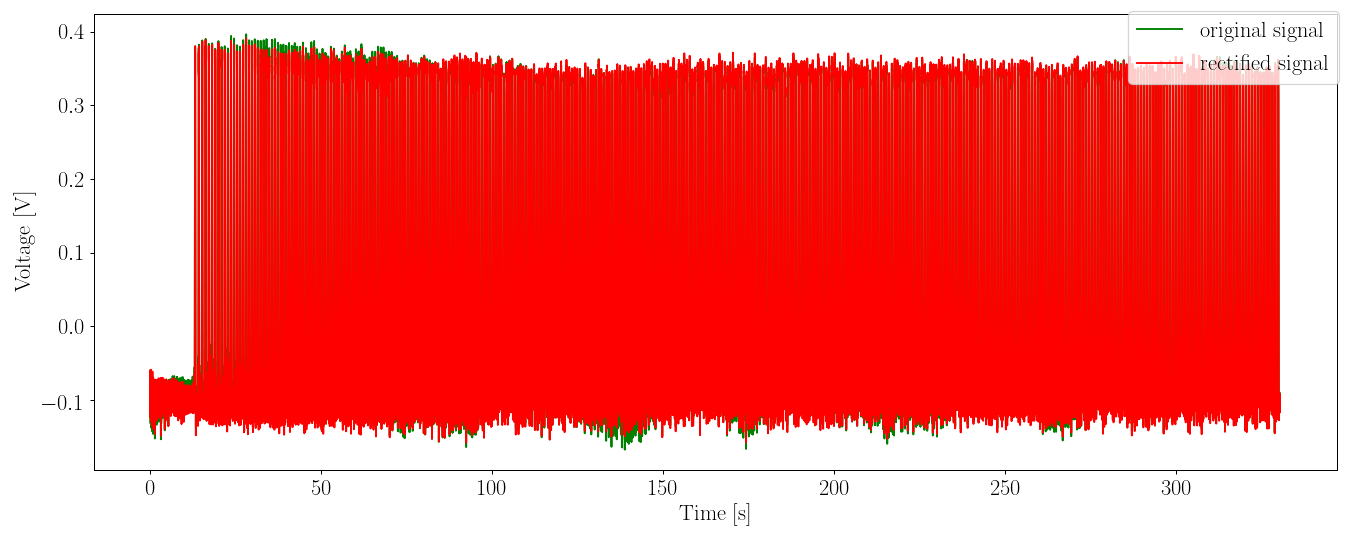

In [78]:
reload(ddt)
fig, sig2_r = ddt.rectify_new(sig2_r, xrange=3, xdata=t, ignore_bias=0.07, manual_thr=-0.25)

In [ ]:
#fig, sig2_r = ddt.rectify_new(sig2_r, xrange=2, xdata=t, ignore_bias=0.07, manual_thr=-1)

## Thresholds computing

### Signal 1

<IPython.core.display.Javascript object>


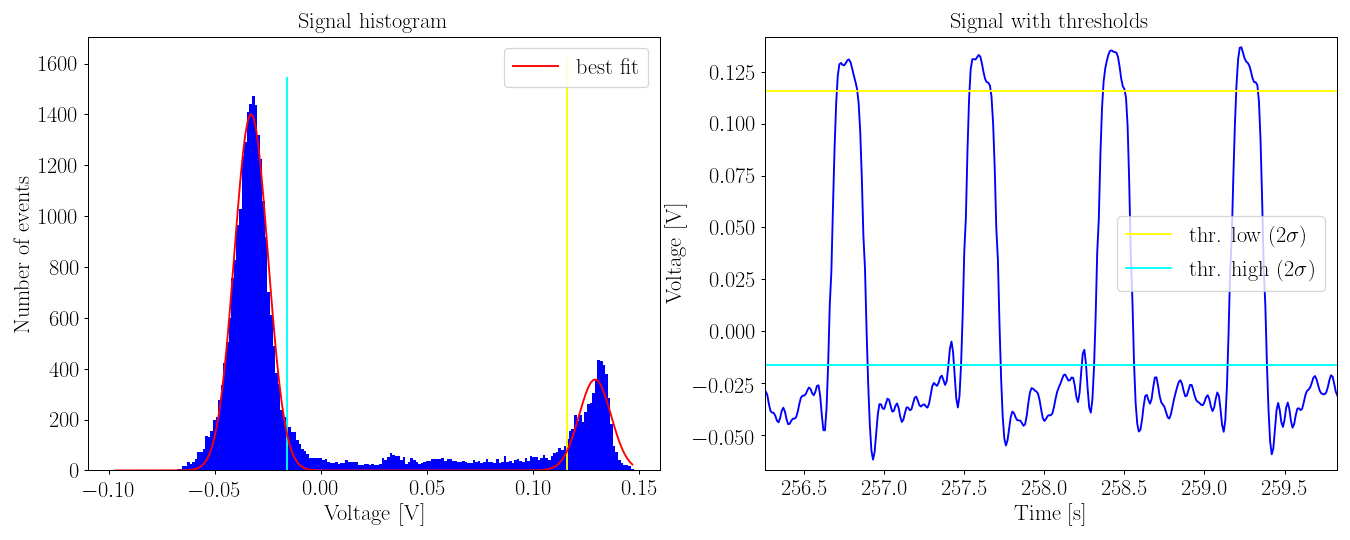

In [64]:
%matplotlib notebook 
%matplotlib notebook
reload(ddt)
thr_low_1, thr_high_1, sigma_low_1, sigma_high_1 = ddt.thr_searcher(sig1_r[:], 200,
                                         high_sigmas=2, low_sigmas=2, Xdata=t[:], c01=None, c02=None,
                                         color='blue', xlabel='Time [s]', ylabel='Voltage [V]')

### Signal 2

<IPython.core.display.Javascript object>


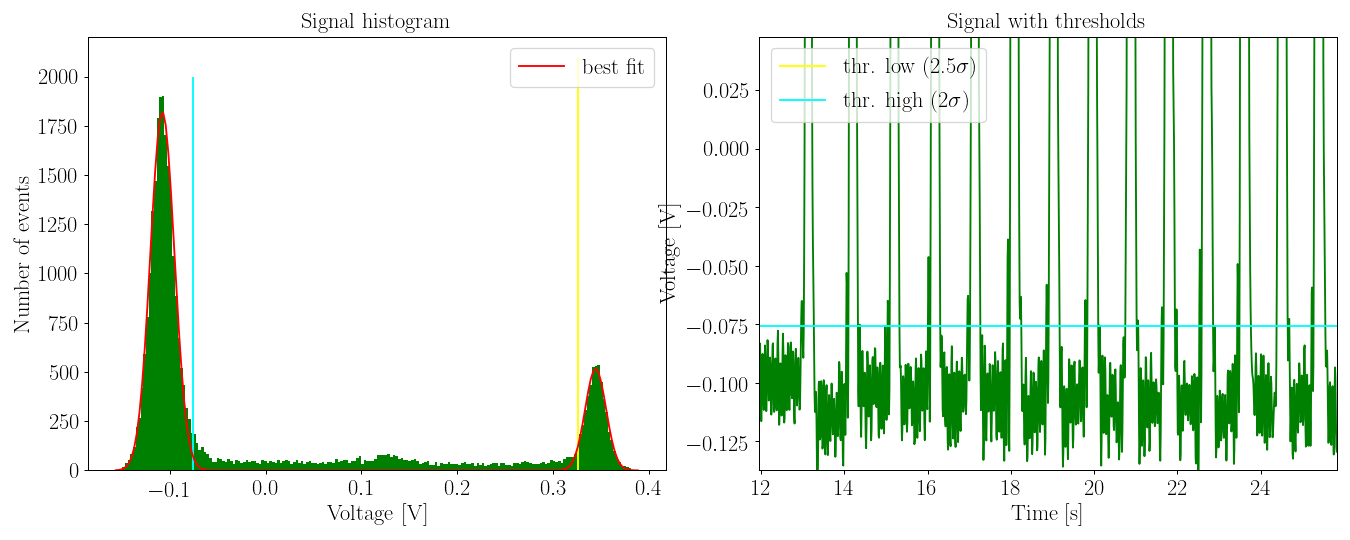

In [80]:
%matplotlib notebook
%matplotlib notebook
thr_low_2, thr_high_2, sigma_low_2, sigma_high_2 = ddt.thr_searcher(sig2_r[:], 200, 
                                         low_sigmas=2.5, high_sigmas=2, Xdata=t[:], c01=-0.1, c02=0.3,
                                         color='green', xlabel='Time [s]', ylabel='Voltage [V]')

## Drops detection

### Signal 1

In [29]:
reload(ddt)

<module 'drop_detection_tools' from '../Library\\drop_detection_tools.py'>

395 395 395 395
6.3100000000000005  cannot properly find wide start: using derivative
FAILED to adjust: overlapping droplets
7.4  cannot properly find wide start: using derivative
7.51  missed previous wide end: adjusting with derivative
8.4  cannot properly find wide start: using derivative
8.53  missed previous wide end: adjusting with derivative
9.39  cannot properly find wide start: using derivative
9.51  missed previous wide end: adjusting with derivative
10.35  cannot properly find wide start: using derivative
10.47  missed previous wide end: adjusting with derivative
11.31  cannot properly find wide start: using derivative
11.43  missed previous wide end: adjusting with derivative
12.26  cannot properly find wide start: using derivative
12.38  missed previous wide end: adjusting with derivative
13.200000000000001  cannot properly find wide start: using derivative
13.32  missed previous wide end: adjusting with derivative
14.11  cannot properly find wide start: using derivative
1

230.26  missed previous wide end: adjusting with derivative
230.94  cannot properly find wide start: using derivative
231.08  missed previous wide end: adjusting with derivative
231.76  cannot properly find wide start: using derivative
231.89000000000001  missed previous wide end: adjusting with derivative
232.57  cannot properly find wide start: using derivative
232.70000000000002  missed previous wide end: adjusting with derivative
232.65  cannot properly find wide start: using derivative
233.52  missed previous wide end: adjusting with derivative
233.52  WRONG WIDE DROP DETECTION
234.20000000000002  cannot properly find wide start: using derivative
234.32  missed previous wide end: adjusting with derivative
235.01  cannot properly find wide start: using derivative
235.15  missed previous wide end: adjusting with derivative
235.83  cannot properly find wide start: using derivative
235.97  missed previous wide end: adjusting with derivative
236.68  cannot properly find wide start: usi

<IPython.core.display.Javascript object>


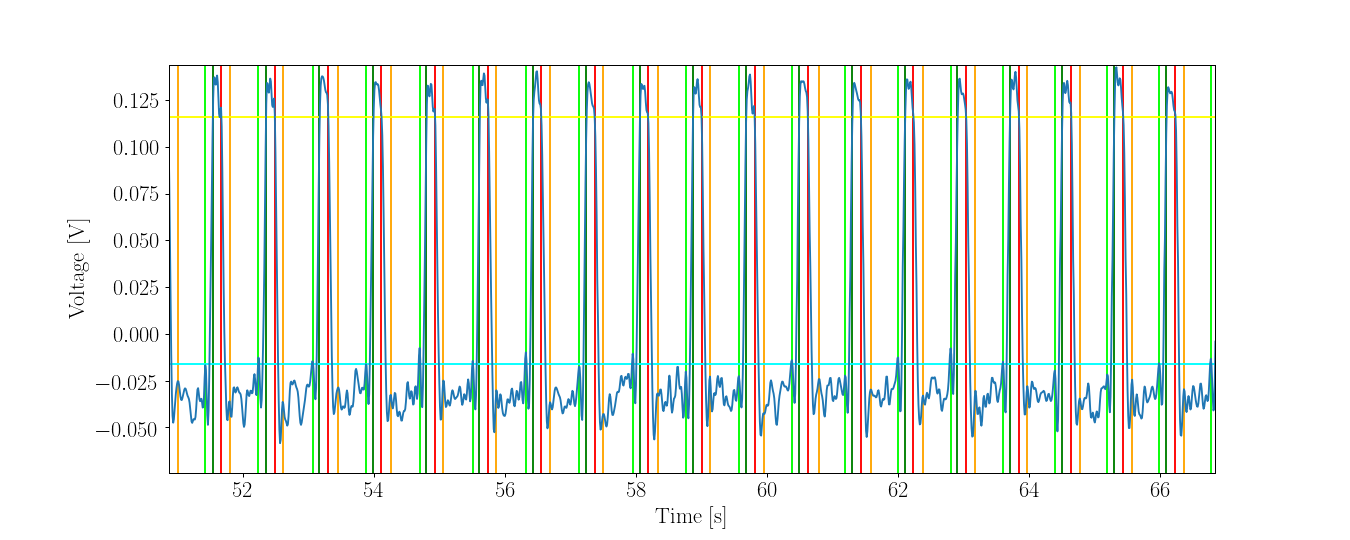

<IPython.core.display.Javascript object>


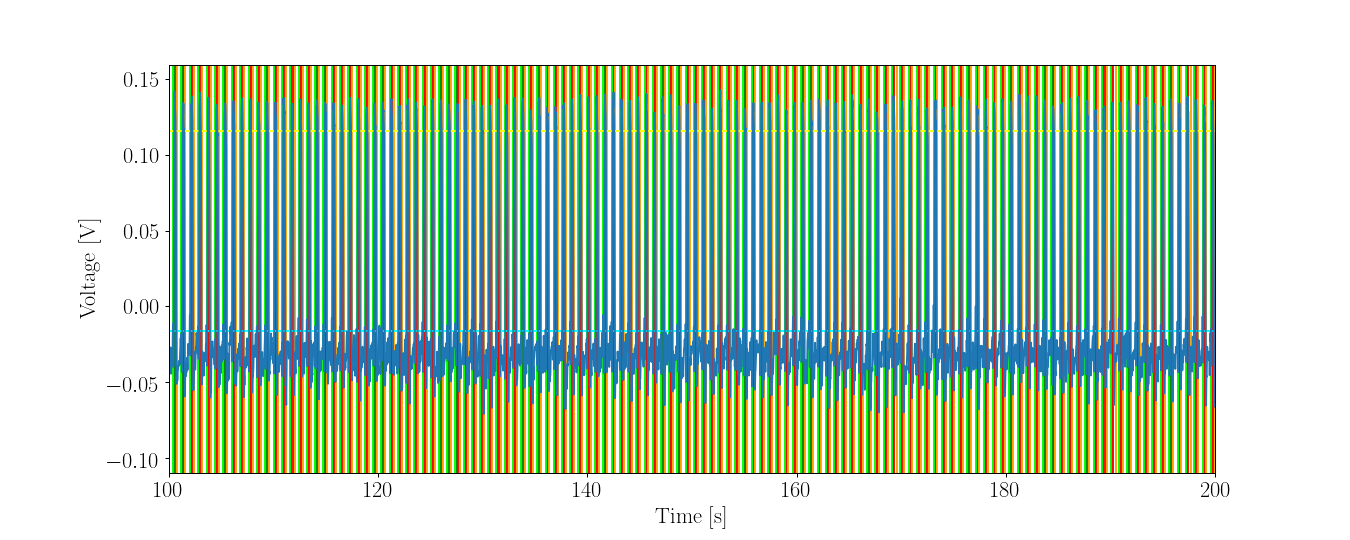

<IPython.core.display.Javascript object>


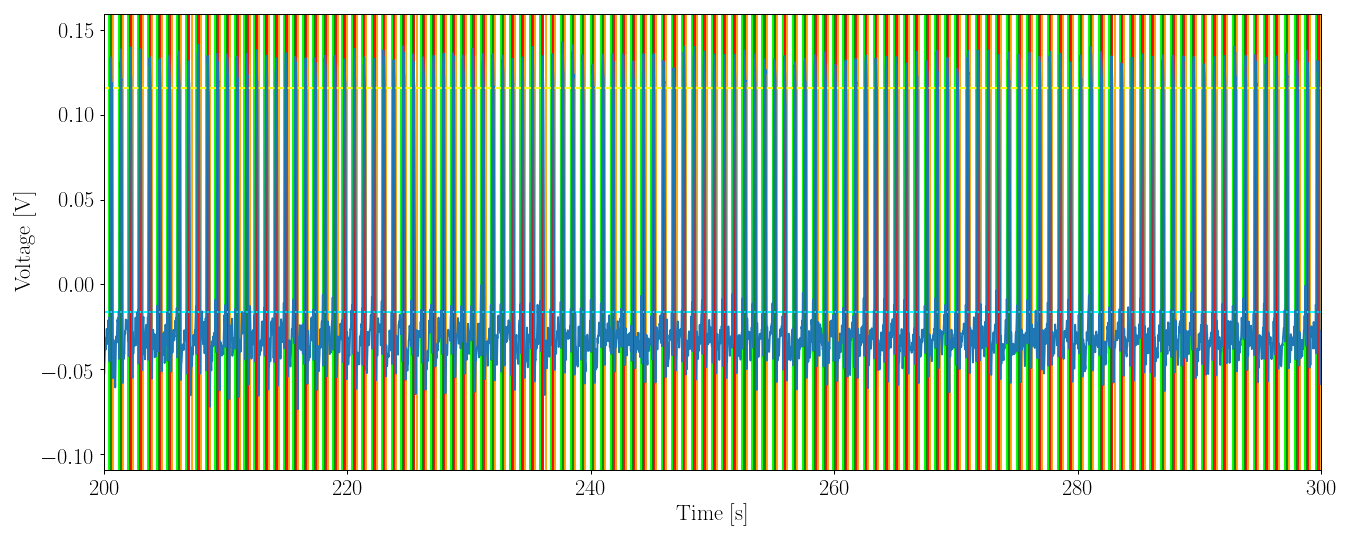

In [99]:
#****************************************
xrange = 100 # single plot x range [s]
#****************************************
reload(plt)
%matplotlib notebook
%matplotlib notebook

returns = ddt.drop_det_new(t, sig1_r, thr_low_1, thr_high_1, backward_skip=1, forward_skip=1, return_indexes=True,
                       xrange=xrange, plot_switch=True, xlabel="Time [s]", ylabel="Voltage [V]", use_derivative=True)

narrow_start_1, narrow_end_1, wide_start_1, wide_end_1 = returns
#function modified to give output arrays in index form, not in seconds.

drop_edges_1 = np.array(list(zip(wide_start_1, narrow_start_1, narrow_end_1, wide_end_1)))


#### Manually correct the position of the edges

In [ ]:
dec1 = ddt.DropEdgeCorrector(drop_edges_1)
dec1(t,sig1_r, figsize=(200,6))

In [ ]:
drop_edges_1 = dec1.drop_edges

wide_start_1, narrow_start_1, narrow_end_1, wide_end_1 = drop_edges_1.T

### Signal 2

388 388 388 388
12.950000000000001  cannot properly find wide start: using derivative
FAILED to adjust: overlapping droplets
14.040000000000001  cannot properly find wide start: using derivative
14.17  missed previous wide end: adjusting with derivative
15.030000000000001  cannot properly find wide start: using derivative
15.16  missed previous wide end: adjusting with derivative
16.0  cannot properly find wide start: using derivative
16.14  missed previous wide end: adjusting with derivative
16.95  cannot properly find wide start: using derivative
17.1  missed previous wide end: adjusting with derivative
17.91  cannot properly find wide start: using derivative
18.05  missed previous wide end: adjusting with derivative
18.84  cannot properly find wide start: using derivative
18.990000000000002  missed previous wide end: adjusting with derivative
19.77  cannot properly find wide start: using derivative
19.92  missed previous wide end: adjusting with derivative
20.12  cannot properly fin

207.18  cannot properly find wide start: using derivative
208.06  missed previous wide end: adjusting with derivative
208.06  WRONG WIDE DROP DETECTION
207.97  cannot properly find wide start: using derivative
208.86  missed previous wide end: adjusting with derivative
208.86  WRONG WIDE DROP DETECTION
209.5  cannot properly find wide start: using derivative
209.65  missed previous wide end: adjusting with derivative
210.3  cannot properly find wide start: using derivative
210.45000000000002  missed previous wide end: adjusting with derivative
210.36  cannot properly find wide start: using derivative
211.24  missed previous wide end: adjusting with derivative
211.24  WRONG WIDE DROP DETECTION
211.9  cannot properly find wide start: using derivative
212.03  missed previous wide end: adjusting with derivative
211.95000000000002  cannot properly find wide start: using derivative
212.83  missed previous wide end: adjusting with derivative
212.83  WRONG WIDE DROP DETECTION
212.75  cannot pr

<IPython.core.display.Javascript object>


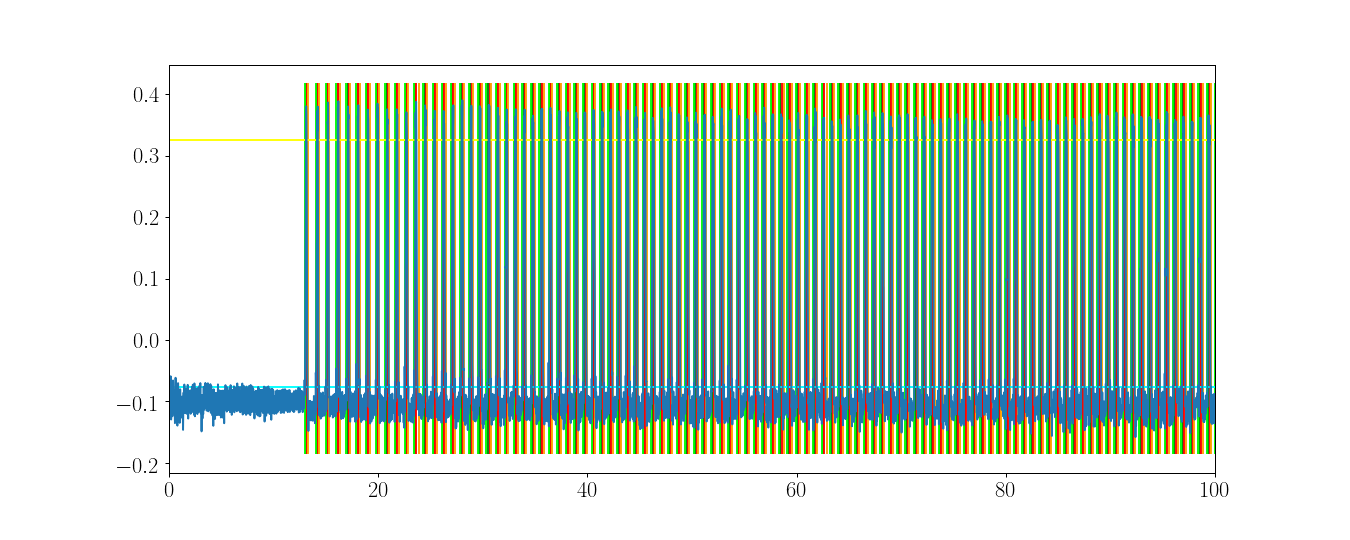

<IPython.core.display.Javascript object>


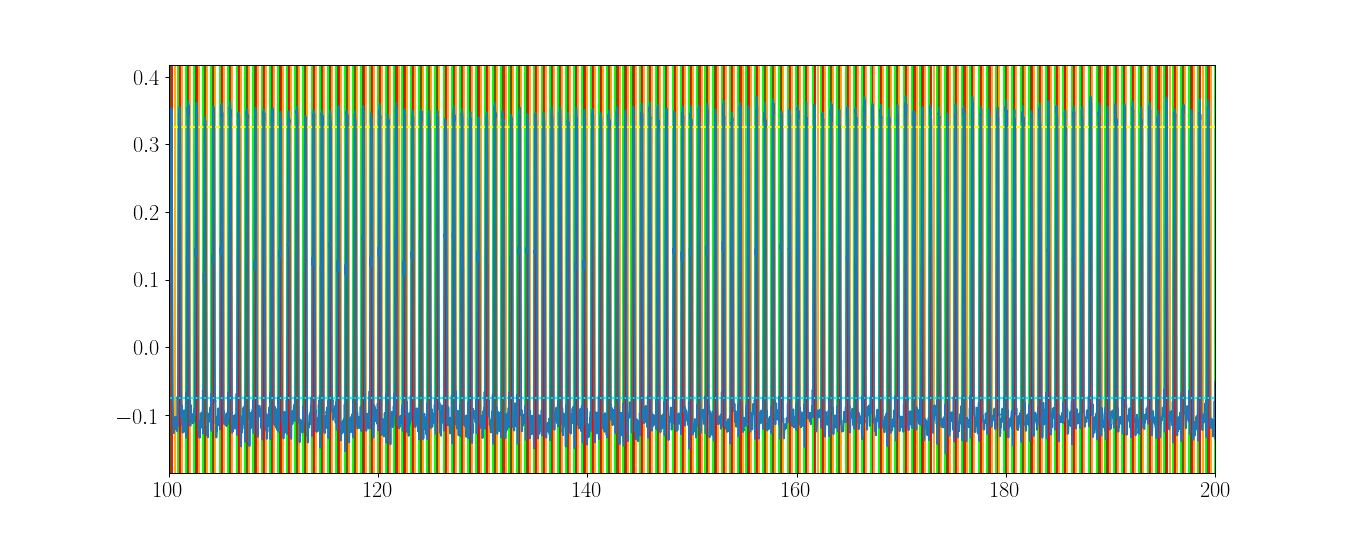

<IPython.core.display.Javascript object>


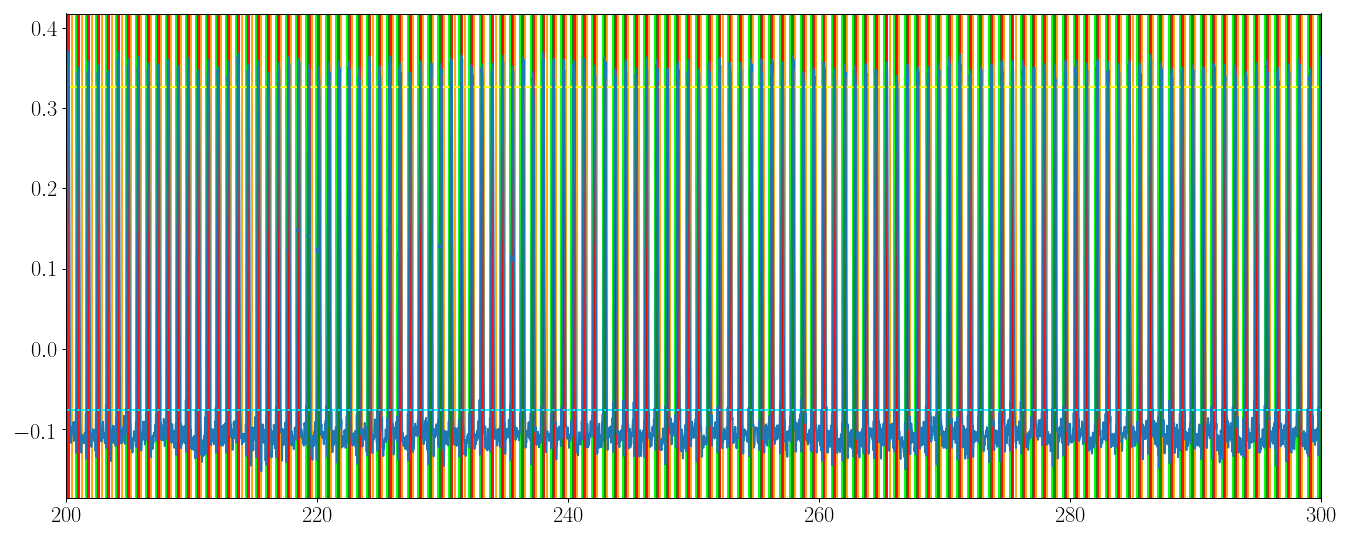

In [100]:
#****************************************
xrange = 100 # single plot x range [s]
#****************************************

%matplotlib notebook
returns = ddt.drop_det_new(t, sig2_r, thr_low_2, thr_high_2, backward_skip=1, forward_skip=1, return_indexes=True,
                       xrange=xrange, plot_switch=True, use_derivative=True)

narrow_start_2, narrow_end_2, wide_start_2, wide_end_2 = returns
#function modified to give output arrays in index form, not in seconds.

drop_edges_2 = np.array(list(zip(wide_start_2, narrow_start_2, narrow_end_2, wide_end_2)))


In [ ]:
help(ddt.DropEdgeCorrector)

In [ ]:
dec2 = ddt.DropEdgeCorrector(drop_edges_2)
dec2(t,sig2_r, figsize=(200,6))

In [ ]:
drop_edges_2 = dec2.drop_edges

wide_start_2, narrow_start_2, narrow_end_2, wide_end_2 = drop_edges_2.T

## Add errors

In [101]:
%matplotlib notebook
%matplotlib notebook
slope_start_1, slope_end_1=ddt.slopes(t,sig1_r, narrow_start_1, narrow_end_1, start_range=3, end_range = 5, 
                                      xlabel="Time [s]", ylabel="Voltage [V]",plot_switch=False)

In [102]:
%matplotlib notebook
slope_start_2, slope_end_2=ddt.slopes(t,sig2_r, narrow_start_2, narrow_end_2, start_range=3, end_range = 3, 
                                      xlabel="Time [s]", ylabel="Voltage [V]", plot_switch=False)

In [103]:
#slope errors for narrow_start and narrow_end
v_err_1 = sigma_high_1
err_slope_start_1 = v_err_1/slope_start_1
err_slope_end_1 = -v_err_1/slope_end_1

v_err_2 = sigma_high_2
err_slope_start_2 = v_err_2/slope_start_2
err_slope_end_2 = -v_err_2/slope_end_2


In [104]:
def res_error(time):
    a = t_raw[np.where(t_raw >= time)]
    if len(a)>1:
        return (a[1] - a[0])/np.sqrt(12)
    else: return 0
#     return a[1] - a[0]

### Make ufloats

In [105]:
#error resolution + error slope (seconds)
err_n_start_1=[]
err_n_end_1=[]
err_w_start_1=[]
err_w_end_1=[]
err_n_start_2=[]
err_n_end_2=[]
err_w_start_2=[]
err_w_end_2=[]

drop_edges_1 = [err_w_start_1, err_n_start_1, err_n_end_1, err_w_end_1]
drop_edges_2 = [err_w_start_2, err_n_start_2, err_n_end_2, err_w_end_2]

for drop_idx in range(len(narrow_start_1)):
    ens1 = (np.sqrt(res_error(t[narrow_start_1[drop_idx]])**2 + err_slope_start_1[drop_idx]**2))
    ene1 = (np.sqrt(res_error(t[narrow_end_1[drop_idx]])**2 + err_slope_end_1[drop_idx]**2))
    ews1 = (res_error(t[wide_start_1[drop_idx]]))
    ewe1 = (res_error(t[wide_end_1[drop_idx]]))
    
    err_n_start_1.append(unc.ufloat(t[narrow_start_1[drop_idx]],ens1))
    err_n_end_1.append(unc.ufloat(t[narrow_end_1[drop_idx]],ene1))
    err_w_start_1.append(unc.ufloat(t[wide_start_1[drop_idx]],ews1))
    err_w_end_1.append(unc.ufloat(t[wide_end_1[drop_idx]],ewe1))

for drop_idx in range(len(narrow_start_2)):
    ens2 = (np.sqrt(res_error(t[narrow_start_2[drop_idx]])**2 + err_slope_start_2[drop_idx]**2))
    ene2 = (np.sqrt(res_error(t[narrow_end_2[drop_idx]])**2 + err_slope_end_2[drop_idx]**2))
    ews2 = (res_error(t[wide_start_2[drop_idx]]))
    ewe2 = (res_error(t[wide_end_2[drop_idx]]))
    
    err_n_start_2.append(unc.ufloat(t[narrow_start_2[drop_idx]],ens2))
    err_n_end_2.append(unc.ufloat(t[narrow_end_2[drop_idx]],ene2))
    err_w_start_2.append(unc.ufloat(t[wide_start_2[drop_idx]],ews2))
    err_w_end_2.append(unc.ufloat(t[wide_end_2[drop_idx]],ewe2))
    

drop_edges_1 = [np.array(e) for e in drop_edges_1]
drop_edges_2 = [np.array(e) for e in drop_edges_2]

err_w_start_1, err_n_start_1, err_n_end_1, err_w_end_1 = drop_edges_1
err_w_start_2, err_n_start_2, err_n_end_2, err_w_end_2 = drop_edges_2

to_adjust = True

## Delay between detectors

In [ ]:
# spannometric estimation of the time interval between the drops, knowing the pumps fluxes and capillary size

#********************************************************
radius  = 0.3  # capillary radius [mm]
sep     = 50   # spearation between the two sensors [mm]
flux_ol = 3    # oil flux   [uL/min] = [mm3/min]
flux_aq = 7    # water flux [uL/min] = [mm3/min]
#********************************************************

A  = np.pi*0.25*radius**2       # capillary area [mm2]
v  = (flux_ol + flux_aq)/A/60   # drops speed [mm/s]
dt = sep/v                      # time interval between two following drops [s]

print('v  = ', v,'\t[mm/s] \ndt = ', dt, '\t[s]')

In [ ]:
#this function calculates delay between sig1 and sig2 by spectra smoothing (delay_gauss) 
#and by simple spectra subtraction (delay_spectra)
    
def delay(sigma, delta, delta_delay, step_delay, start_time, stop_time, step_time, vec1, vec2, signal1, signal2,
          min_cut_idx=0, max_cut_idx=5000):   
    
    
    # Gaussian formula ---------------------------------------

    q = np.sqrt(2*np.pi)
    def gaus(x, mu, sigma):
        return np.exp(-(x - mu)**2/(2*sigma**2))/(sigma*q)

    
    # Gaussian smoothing functions ---------------------------

    # Signal 1
    @np.vectorize
    def sig1_smooth(t, sigma, delta):
        s = 0.
        for t_s in vec1:
            if (t - t_s)**2 < (delta*sigma)**2:
                s += gaus(t,t_s,sigma)
            if t_s - t > (delta+1)*sigma:
                break
        return s
    
    # Signal 2
    @np.vectorize
    def sig2_smooth(t, sigma, delta):
        s = 0.
        for t_s in vec2:
            if (t - t_s)**2 < (delta*sigma)**2:
                s += gaus(t,t_s,sigma)
            if t_s - t > (delta+1)*sigma:
                break
        return s


    # Delay computing ::::::::::::::::::::::::::::::::::::::::::::
    
    start_delay = dt - delta_delay                                # initial evaluated delay [s]
    stop_delay  = dt + delta_delay                                # final evaluated delay [s]
    time_delays = np.arange(start_delay, stop_delay, step_delay)  # vector of evaluated delays [s]
    ts          = np.arange(start_time,  stop_time,  step_time)   # vector of scanned times [s]
    msqs        = []                                              # stdev between sig.1 and sig.2 delayed 

    
    # Computing delay_gauss --------------------------------------
    
    for time_delay in tqdm(time_delays):

        sig1_t = sig1_smooth(ts, sigma, delta)
        sig2_t = sig2_smooth(ts + time_delay, sigma, delta)
        msqs.append(np.mean((sig2_t - sig1_t)**2))

    msqs=np.array(msqs)
    delay_gauss=time_delays[msqs==min(msqs)]
    
    
    # Delay with spectra-subtraction -----------------------------
    
    delay_idxs = np.arange(int(start_delay*100), int(stop_delay*100))
    msqs1 = []

    for idx in delay_idxs:
            #sig1_cut = sig1_high[:len(sig2_high) - idx][start_time*100:stop_time*100]
            #sig2_cut = sig2_high[idx:][start_time*100:stop_time*100]
            sig1_cut = signal1[:len(signal2) - idx][min_cut_idx:max_cut_idx]
            sig2_cut = signal2[idx:][min_cut_idx:max_cut_idx]
            msqs1.append(np.mean((sig1_cut - sig2_cut)**2))
    msqs1=np.array(msqs1)
    delay_spectra=t[delay_idxs[[msqs1==min(msqs1)]]] 
   

    # Plots ------------------------------------------------------
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))    
    ax[0].set_title('Delay spectrum from gaussian broadening')
    ax[0].set_xlabel("delay [s]")
    ax[0].set_ylabel("msqs")
    ax[0].plot(time_delays,msqs)
    ax[1].set_title('Delay spectrum from signal subtraction')
    ax[1].set_xlabel("Delay [s]")
    ax[1].set_ylabel("msqs")
    ax[1].set_xlim(*ax[0].get_xlim())
    ax[1].plot(t[delay_idxs],msqs1)
    fig.tight_layout()
    
    #define the number of initial drops to be neglected in sig2 
    neglected_drops_2 = vec2[vec2<delay_spectra]
    d2 = len(neglected_drops_2)    
          
    return delay_gauss, delay_spectra, d2

In [ ]:
#*********************************************************************************************
# Signal gaussian smoothing
sigma       = 0.01   # stdev
delta       = 2      # range = delta*stdev
# Delay
delta_delay = 10      # range of evaluated delays = [dt - delta_delay ; dt + delta_delay] [s]
step_delay  = 0.05   # step of evaluated delays [s]
# Time
start_time  = 30     # scanning signal starting time [s]
stop_time   = 45     # scanning signal stopping time [s]
step_time   = 0.005  # scanning signal step time [s]

vec1 = np.array([d.n for d in err_w_start_1])
vec2 = np.array([d.n for d in err_w_start_2])

signal1 = sig1_r
signal2 = sig2_r
#*********************************************************************************************

delay_gauss, delay_spectra, d2 = delay(sigma, delta, delta_delay, step_delay, start_time, stop_time, step_time,
                                       vec1, vec2, signal1, signal2,
                                       min_cut_idx=3000, max_cut_idx = 4500)

delay_gauss, delay_spectra, d2

### Manually check the delay

In [ ]:
def align(delay):
    
    delay_idx = int(delay*100)
    
    fig, ax1 = plt.subplots(figsize=(9,6))
    
    ax1.plot(t, sig1_r, color='blue', alpha=0.3)
    
    ax2 = ax1.twinx()
    
    ax2.plot(t[:-delay_idx], sig2_r[delay_idx:], color='red', alpha=0.3)
    

def align_space(delay):
    delay_idx = int(delay*100)
    
    fig, ax1 = plt.subplots(figsize=(9,6))
    
    ax1.plot(t*50/delay, sig1_r, color='blue', alpha=0.3)
    
    ax2 = ax1.twinx()
    
    ax2.plot(t[:-delay_idx]*50/delay, sig2_r[delay_idx:], color='red', alpha=0.3)
    
    ax1.set_xlabel('position [mm]')

In [ ]:
delay_gauss, delay_spectra, d2

In [ ]:
%matplotlib notebook
%matplotlib notebook

align_space(25)

## Adjust drops according to delay

In [87]:
#decide whether to use calculated d2 or to set it by hand
#d2 = 2
def adjust_drops(d1,d2, drop_edges_1, drop_edges_2):
    
    drop_edges_1 = [d[d1:] for d in drop_edges_1]
    drop_edges_2 = [d[d1 + d2:] for d in drop_edges_2]
    
    len2 = len(drop_edges_2[0])
    drop_edges_1 = [d[:len2] for d in drop_edges_1]
    
    return drop_edges_1, drop_edges_2

In [106]:
#THIS FUNCTION MODIFIES drop_start and drop_end s arrays
to_adjust=True
d1 = 0          #d1>0 to discard some initial drops that are present in both signals
d2 = 0
if to_adjust:
    drop_edges_1,drop_edges_2 = adjust_drops(d1,d2, drop_edges_1, drop_edges_2)

    err_w_start_1, err_n_start_1, err_n_end_1, err_w_end_1 = drop_edges_1
    err_w_start_2, err_n_start_2, err_n_end_2, err_w_end_2 = drop_edges_2
    
    to_adjust = False

# PLOTTING

### functions for plotting and file for saving parameters

In [89]:
def double_histo_plot(bins, v_1, v_2, title, xlabel, ylabel):
    
    #reload(uplt)
    fig = plt.figure(figsize=(10,5))
    gs = GridSpec(3,5)

    ax_joint = fig.add_subplot(gs[:,0:3])
    ax_marg_y_1 = fig.add_subplot(gs[:,3])
    ax_marg_y_2 = fig.add_subplot(gs[:,4])

    uplt.plot(v_1, ax = ax_joint, label='sig1')
    uplt.plot(v_2, ax = ax_joint, color='green', label='sig2')

    k1=uplt.ExtendedKDE(v_1) 
    ylim=ax_joint.get_ylim()
    x1,f1 = k1.plot(np.linspace(ylim[0],ylim[1],bins), ax = ax_marg_y_1, switch_xy=True)

    k2=uplt.ExtendedKDE(v_2) 
    ylim=ax_joint.get_ylim()
    x2,f2 = k2.plot(np.linspace(ylim[0],ylim[1],bins), ax = ax_marg_y_2, switch_xy=True, color='green')

    #Turn off tick labels on marginals
    plt.setp(ax_marg_y_1.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y_2.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel(xlabel)
    ax_joint.set_ylabel(ylabel)

    ax_joint.legend(loc='best')
    plt.title(title,loc='right', pad=15)

    #kde fit
    mod1 = GaussianModel(prefix='g1_')
    pars1 = mod1.guess(f1, x=x1)
#     mod1 = GaussianModel(prefix='g1_')+GaussianModel(prefix='g1b_')
#     pars1 = mod1.make_params(g1_center = 1.2, g1b_center=1.4, g1_amplitude=100, g1b_amplitude=100, g1_sigma=0.05, g1b_sigma=0.05)
    out1 = mod1.fit(f1, pars1, x=x1)
    #print(out1.params)
    ax_marg_y_1.plot(out1.best_fit, x1, 'r-', label='best fit')

    mod2 = GaussianModel(prefix='g2_')
#     mod2 = GaussianModel(prefix='g2_')+GaussianModel(prefix='g2b_')
#     pars2 = mod2.make_params(g2_center = 1.2, g2b_center=1.4, g2_amplitude=100, g2b_amplitude=100, g2_sigma=0.05, g2b_sigma=0.05)
    pars2 = mod2.guess(f2, x=x2)
    out2 = mod2.fit(f2, pars2, x=x2)
    ax_marg_y_2.plot(out2.best_fit, x2, 'r-', label='best fit')
       
    c_1 = unc.ufloat(out1.params['g1_center'].value, out1.params['g1_center'].stderr)
    sigma_1 = unc.ufloat(out1.params['g1_sigma'].value, out1.params['g1_sigma'].stderr)
#     c_1b = unc.ufloat(out1.params['g1b_center'].value, out1.params['g1b_center'].stderr)
#     sigma_1b = unc.ufloat(out1.params['g1b_sigma'].value, out1.params['g1b_sigma'].stderr)
    c_2 = unc.ufloat(out2.params['g2_center'].value, out2.params['g2_center'].stderr)
    sigma_2 = unc.ufloat(out2.params['g2_sigma'].value, out2.params['g2_sigma'].stderr)
#     c_2b = unc.ufloat(out2.params['g2b_center'].value, out2.params['g2b_center'].stderr)
#     sigma_2b = unc.ufloat(out2.params['g2b_sigma'].value, out2.params['g2b_sigma'].stderr)

    fig.tight_layout()
    plt.show()
    return fig, c_1, sigma_1, c_2, sigma_2
    #return fig, c_1, sigma_1, c_1b, sigma_1b, c_2, sigma_2, c_2b, sigma_2b

In [90]:
def dt_vel(bins,dt_mid,v_mid, fit_switch=False):
    
    fig = plt.figure(figsize=(10,7.5))

    gs = GridSpec(7,4)
    #first plot
    ax_joint = fig.add_subplot(gs[:3,0:3])
    ax_marg_y = fig.add_subplot(gs[:3,3])

    uplt.plot(dt_mid, ax = ax_joint, label='time interval')  
    
    k1=uplt.ExtendedKDE(dt_mid) 
    ylim=ax_joint.get_ylim()
    x1,f1 = k1.plot(np.linspace(ylim[0],ylim[1],bins), ax = ax_marg_y, switch_xy=True)

    ax_joint.set_xlabel('drop id')
    ax_joint.set_ylabel('detectors time interval [s]')

    plt.title('Temporal delay of drops in the detectors and drop velocity',loc='right', pad=15)

    plt.setp(ax_marg_y.get_yticklabels(), visible=False)
    
    
    mod1 = GaussianModel(prefix='g1_')
    pars1 = mod1.guess(f1, x=x1)
#     mod1 = GaussianModel(prefix='g1_')+GaussianModel(prefix='g1b_')
#     pars1 = mod1.make_params(g1_center = 1.2, g1b_center=1.4, g1_amplitude=100, g1b_amplitude=100, g1_sigma=0.05, g1b_sigma=0.05)
    out1 = mod1.fit(f1, pars1, x=x1)
    #print(out1.params)
    
    #second plot
    ax1_joint = fig.add_subplot(gs[4:,0:3])
    ax1_marg_y = fig.add_subplot(gs[4:,3])

    uplt.plot(0.5*(np.mean(drop_edges_1,0)+np.mean(drop_edges_2,0)),v_mid, ax=ax1_joint, label='velocity', color='green')
    k2=uplt.ExtendedKDE(v_mid) 
    ylim=ax1_joint.get_ylim()
    x2,f2 = k2.plot(np.linspace(ylim[0],ylim[1],bins), ax = ax1_marg_y, switch_xy=True, color='green')


    ax1_joint.set_xlabel('time (drop equidistant from detectors) [s]')
    ax1_joint.set_ylabel('drops velocity [mm/s]')    
   
    plt.setp(ax1_marg_y.get_yticklabels(), visible=False)
    
    mod2 = GaussianModel(prefix='g2_')
    pars2 = mod2.guess(f2, x=x2)
#     mod1 = GaussianModel(prefix='g1_')+GaussianModel(prefix='g1b_')
#     pars1 = mod1.make_params(g1_center = 1.2, g1b_center=1.4, g1_amplitude=100, g1b_amplitude=100, g1_sigma=0.05, g1b_sigma=0.05)
    out2 = mod2.fit(f2, pars2, x=x2)
    #print(out1.params)
    
    if fit_switch:
        ax1_marg_y.plot(out2.best_fit, x2, 'r-', label='best fit')
        ax_marg_y.plot(out1.best_fit, x1, 'r-', label='best fit')
    
    #Turn off tick labels on marginals
    plt.setp(ax1_marg_y.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)    

    c_1 = unc.ufloat(out1.params['g1_center'].value, out1.params['g1_center'].stderr)
    sigma_1 = unc.ufloat(out1.params['g1_sigma'].value, out1.params['g1_sigma'].stderr)
    c_2 = unc.ufloat(out2.params['g2_center'].value, out2.params['g2_center'].stderr)
    sigma_2 = unc.ufloat(out2.params['g2_sigma'].value, out2.params['g2_sigma'].stderr)   

    fig.tight_layout()
    plt.show()

    return fig, c_1, sigma_1, c_2, sigma_2


In [91]:
fit_dict = {}

### temporal distance

<IPython.core.display.Javascript object>


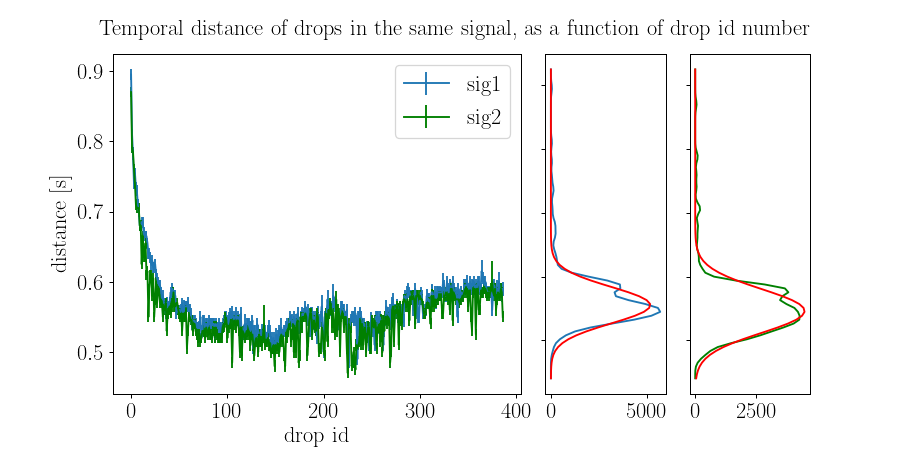

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:06<00:00, 13.31it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [107]:
title = 'Temporal distance of drops in the same signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'distance [s]'
bins    = 80

t_dist_1 =  (drop_edges_1[0][1:]-drop_edges_1[2][:-1]+drop_edges_1[1][1:]-drop_edges_1[3][:-1])*0.5
t_dist_2 =  (drop_edges_2[0][1:]-drop_edges_2[2][:-1]+drop_edges_2[1][1:]-drop_edges_2[3][:-1])*0.5

f1, t_d_fit_1, sigma_t_d_fit_1, t_d_fit_2, sigma_t_d_fit_2 = double_histo_plot(bins, v_1=t_dist_1, v_2=t_dist_2, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

subname = 'time_dist'
f1.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['Temporal distance 1 [s]'] = np.array([t_d_fit_1, sigma_t_d_fit_1])
fit_dict['Temporal distance 2 [s]'] = np.array([t_d_fit_2, sigma_t_d_fit_2])

### temporal size

<IPython.core.display.Javascript object>


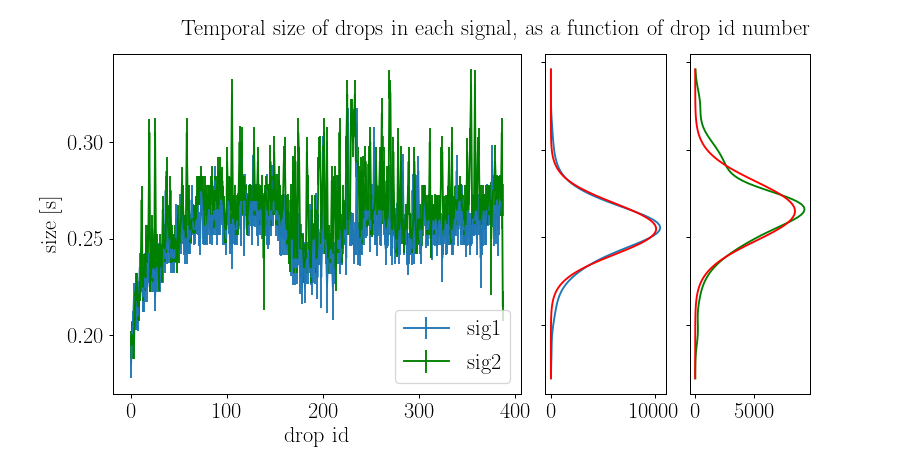

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:09<00:00, 13.11it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [108]:
title = 'Temporal size of drops in each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'size [s]'
bins=80

t_size_1 =  (drop_edges_1[2]-drop_edges_1[0]+drop_edges_1[3]-drop_edges_1[1])*0.5
t_size_2 =  (drop_edges_2[2]-drop_edges_2[0]+drop_edges_2[3]-drop_edges_2[1])*0.5

f2, t_s_fit_1, sigma_t_s_fit_1, t_s_fit_2, sigma_t_s_fit_2 = double_histo_plot(bins, v_1=t_size_1, v_2=t_size_2, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

subname = 'time_size'
f2.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['temporal size 1 [s]'] = np.array([t_s_fit_1, sigma_t_s_fit_1])
fit_dict['temporal size 2 [s]'] = np.array([t_s_fit_2, sigma_t_s_fit_2])

### temporal period

<IPython.core.display.Javascript object>


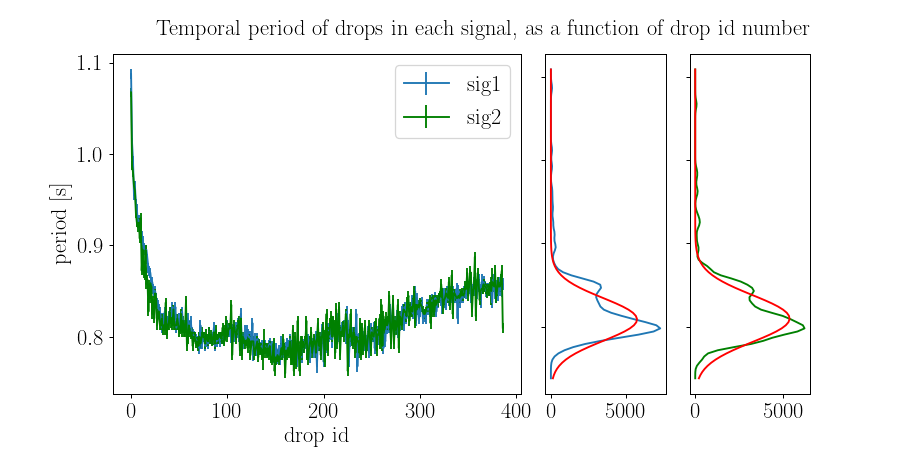

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.01it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [109]:
title = 'Temporal period of drops in each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'period [s]'
bins=100

t_period_1 =  (drop_edges_1[0][1:]-drop_edges_1[0][:-1])*0.25
t_period_2 =  (drop_edges_2[0][1:]-drop_edges_2[0][:-1])*0.25
for i in range(1,4):
    t_period_1 +=  (drop_edges_1[i][1:]-drop_edges_1[i][:-1])*0.25
    t_period_2 +=  (drop_edges_2[i][1:]-drop_edges_2[i][:-1])*0.25

f3, t_p_fit_1, sigma_t_p_fit_1, t_p_fit_2, sigma_t_p_fit_2 = double_histo_plot(bins, v_1=t_period_1, v_2=t_period_2, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

subname = 'time_period'
f3.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['temporal period 1 [s]'] = np.array([t_p_fit_1, sigma_t_p_fit_1])
fit_dict['temporal period 2 [s]'] = np.array([t_p_fit_2, sigma_t_p_fit_2])

### velocity

<IPython.core.display.Javascript object>


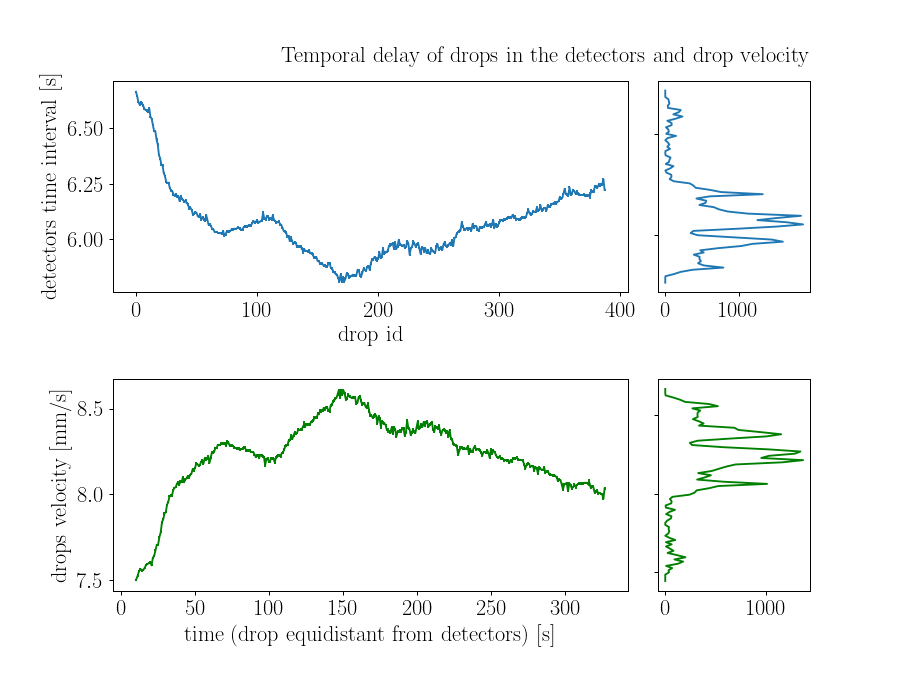

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:06<00:00, 13.60it/s]
<ipython-input-90-8eba750434db>:66: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [110]:
bins=90

dt_mid = (drop_edges_2[0]-drop_edges_1[0])*0.25
for i in range(1,4):
    dt_mid += (drop_edges_2[i]-drop_edges_1[i])*0.25    
v_mid = 50/dt_mid

fit_switch=False
subname ='velocity'

f4, dt_1, sigma_dt_1, v_2, sigma_v_2 = dt_vel(bins,dt_mid,v_mid, fit_switch)
f4.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['dt detectors [s]'] = np.array([dt_1, sigma_dt_1])
fit_dict['velocity [mm/s]'] = np.array([v_2, sigma_v_2])


### spatial size

<IPython.core.display.Javascript object>


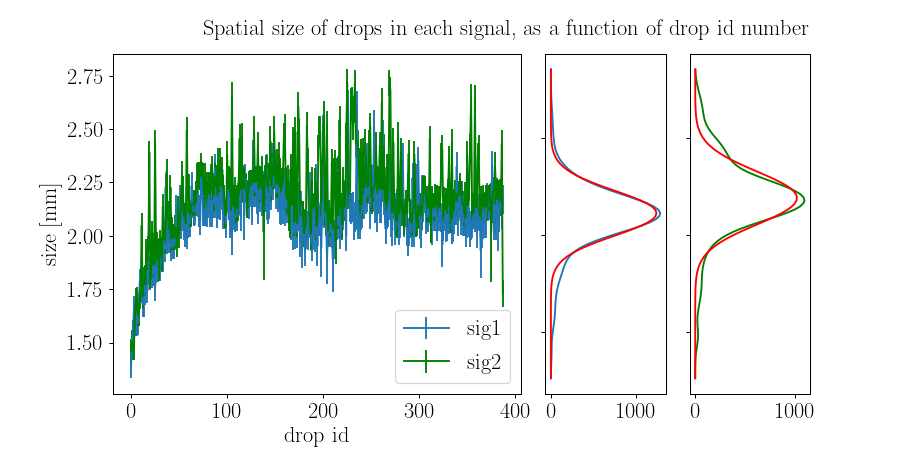

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.00it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [111]:
title = 'Spatial size of drops in each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'size [mm]'
bins=100

f5, s_s_fit_1, sigma_s_s_fit_1, s_s_fit_2, sigma_s_s_fit_2 = double_histo_plot(bins, v_1=t_size_1*v_mid, v_2=t_size_2*v_mid, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

subname = 'space_size'
f5.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['spatial size 1 [s]'] = np.array([s_s_fit_1, sigma_s_s_fit_1])
fit_dict['spatial size 2 [s]'] = np.array([s_s_fit_2, sigma_s_s_fit_2])

### Space distance

<IPython.core.display.Javascript object>


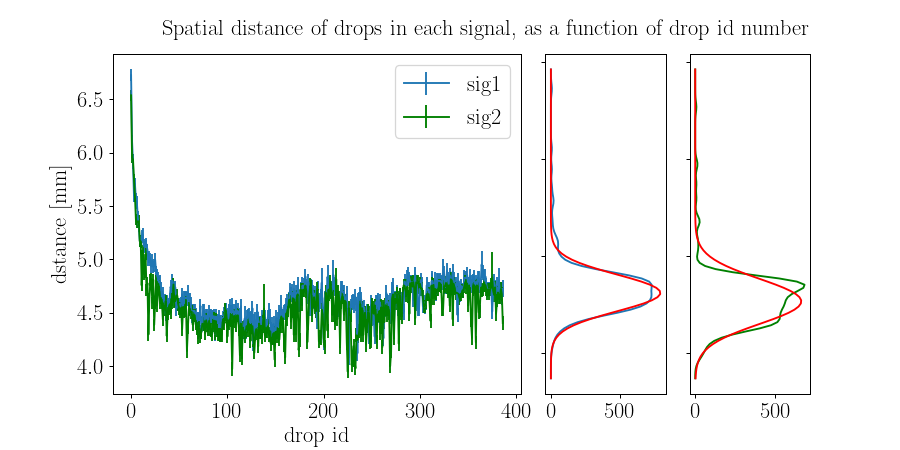

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.84it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [112]:
title = 'Spatial distance of drops in each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'dstance [mm]'
bins=100

f5b, s_d_fit_1, sigma_s_d_fit_1, s_d_fit_2, sigma_s_d_fit_2 = double_histo_plot(bins, v_1=t_dist_1*(v_mid[:-1]+v_mid[1:])*0.5, v_2=t_dist_2*(v_mid[:-1]+v_mid[1:])*0.5, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

subname = 'space_distance'
f5b.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['spatial distance 1 [s]'] = np.array([s_d_fit_1, sigma_s_d_fit_1])
fit_dict['spatial distance 2 [s]'] = np.array([s_d_fit_2, sigma_s_d_fit_2])

### fiber spatial size

<IPython.core.display.Javascript object>


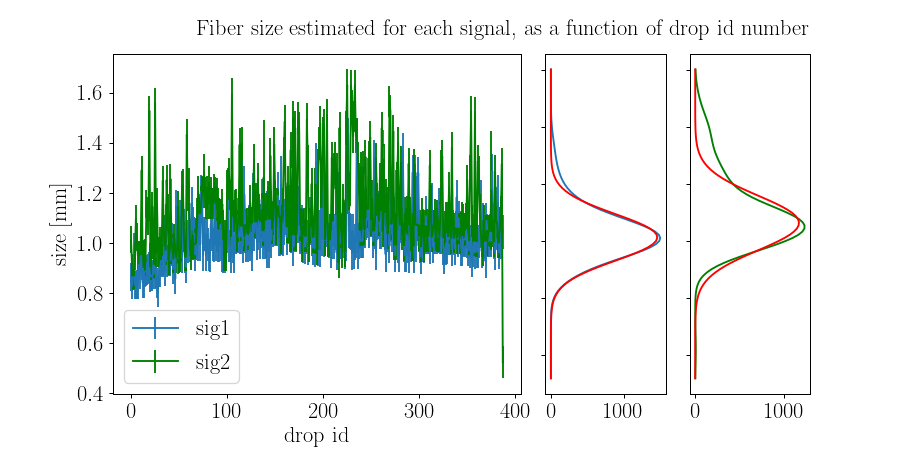

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.80it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [113]:
title = 'Fiber size estimated for each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'size [mm]'
bins=100

fiber_1 = (drop_edges_1[1]-drop_edges_1[0]+drop_edges_1[3]-drop_edges_1[2])*0.5
fiber_2 = (drop_edges_2[1]-drop_edges_2[0]+drop_edges_2[3]-drop_edges_2[2])*0.5

f6, fiber_fit_1, sigma_fiber_fit_1, fiber_fit_2, sigma_fiber_fit_2 = double_histo_plot(bins, v_1=fiber_1*v_mid, v_2=fiber_2*v_mid, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

subname = 'fiber'
f6.savefig(f'{plot_dir}/{name}_{subname}.png')

fit_dict['fiber spatial size 1 [s]'] = np.array([fiber_fit_1, sigma_fiber_fit_1])
fit_dict['fiber spatial size 2 [s]'] = np.array([fiber_fit_2, sigma_fiber_fit_2])

<IPython.core.display.Javascript object>


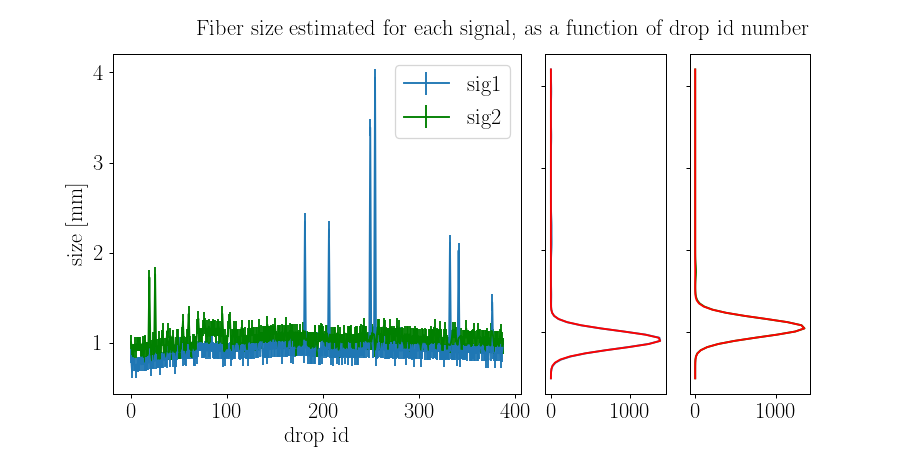

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.69it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [96]:
title = 'Fiber size estimated for each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'size [mm]'
bins=100

fiber_1 = drop_edges_1[1]-drop_edges_1[0]
fiber_2 = drop_edges_2[1]-drop_edges_2[0]
%matplotlib notebook
f6, fiber_fit_1, sigma_fiber_fit_1, fiber_fit_2, sigma_fiber_fit_2 = double_histo_plot(bins, v_1=fiber_1*v_mid, v_2=fiber_2*v_mid, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

<IPython.core.display.Javascript object>


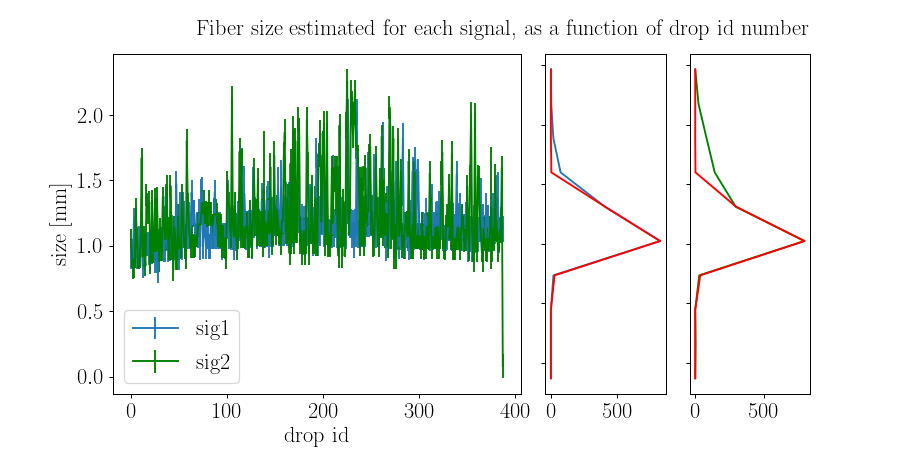

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.51it/s]
<ipython-input-89-bdfbf37a4ac4>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [114]:
title = 'Fiber size estimated for each signal, as a function of drop id number'
xlabel = 'drop id'
ylabel = 'size [mm]'
bins=10

fiber_1 = drop_edges_1[3]-drop_edges_1[2]
fiber_2 = drop_edges_2[3]-drop_edges_2[2]
%matplotlib notebook
f6, fiber_fit_1, sigma_fiber_fit_1, fiber_fit_2, sigma_fiber_fit_2 = double_histo_plot(bins, v_1=fiber_1*v_mid, v_2=fiber_2*v_mid, 
                                                                    title=title, xlabel=xlabel, ylabel=ylabel)

## Save all fit results

In [115]:
fit_dict

{'Temporal distance 1 [s]': array([0.5551827332382652+/-0.0008912068416419733,
        0.02860897946301688+/-0.0008911865013927947], dtype=object),
 'Temporal distance 2 [s]': array([0.5460871127784069+/-0.0008205329249807518,
        0.034329432082149225+/-0.0008208646197874727], dtype=object),
 'dt detectors [s]': array([6.046599752050953+/-0.008294397513345127,
        0.12330290438672664+/-0.008403845903858466], dtype=object),
 'velocity [mm/s]': array([8.267345666401518+/-0.011432511302447903,
        0.16831684940554803+/-0.011548100555680478], dtype=object),
 'fiber spatial size 1 [s]': array([1.016342577198823+/-0.0009374804814820939,
        0.10238948552070548+/-0.0009374788335431614], dtype=object),
 'fiber spatial size 2 [s]': array([1.079672631029373+/-0.003252157051798538,
        0.12001293178031802+/-0.003252200927262307], dtype=object),
 'temporal size 1 [s]': array([0.25483134381074773+/-0.00011944417790571249,
        0.014570636039519691+/-0.00011944374708803368], d

In [116]:
fit_df = pd.DataFrame(data=[], columns=['property', 'mean', 'mean std', 'sigma', 'sigma std'])
for k,a in fit_dict.items():
    fit_df.loc[len(fit_df)] = [k, a[0].n, a[0].s, a[1].n, a[1].s]

In [117]:
def safe_save(method, filename, **kwargs):    
    while(os.path.exists(filename)):
        o = input(f'{filename} already exists: overwrite? [y/n] ')
        if o == 'y':
            break
        o = input('Would you like to save with another name? [y/n]')
        if o != 'y':
            return
        filename = input('Type filename: ')
            
    return method(filename, **kwargs)

In [118]:
save_path = f'{result_dir}/{name}_e.csv'

safe_save(fit_df.to_csv, filename=save_path, index=False)